LINEAR REGRESSION

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv("./Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
print(df.isna().values.any())
print(df.isnull().values.any())


False
False


In [5]:
duplicate_rows = df[df.duplicated()]
print(f"Duplicate rows: {len(duplicate_rows)}")
#df = df.drop_duplicates()


Duplicate rows: 0


In [6]:
df.describe()



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [7]:
df.corr()['Weekly_Sales'].round(2)

Store          -0.34
Date            0.01
Weekly_Sales    1.00
Holiday_Flag    0.04
Temperature    -0.06
Fuel_Price      0.01
CPI            -0.07
Unemployment   -0.11
Name: Weekly_Sales, dtype: float64

In [8]:
#since sklearn linear regression model cannot handle date columns, transform the type and drop that col
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# 3. Drop columns not useful directly for regression
df = df.drop(columns=['Date'])

In [9]:
Y=df['Weekly_Sales']

In [11]:
from sklearn.preprocessing import StandardScaler
X=df.drop('Weekly_Sales', axis=1)
# 4. One-hot encode categorical columns
X = pd.get_dummies(X, columns=['Store', 'Holiday_Flag'], drop_first=True)

# 5. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
x_train, x_test, y_train, y_test= train_test_split(X_scaled, Y, test_size=0.2)

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

In [18]:
import  sklearn.metrics as m

In [19]:
mse=m.mean_squared_error(y_test, y_pred)
mse

29053353197.718113

In [20]:
rmse= m.root_mean_squared_error(y_test, y_pred)
rmse

170450.4420578548

In [21]:
r2= m.r2_score(y_test, y_pred)
r2

0.9147886115846235

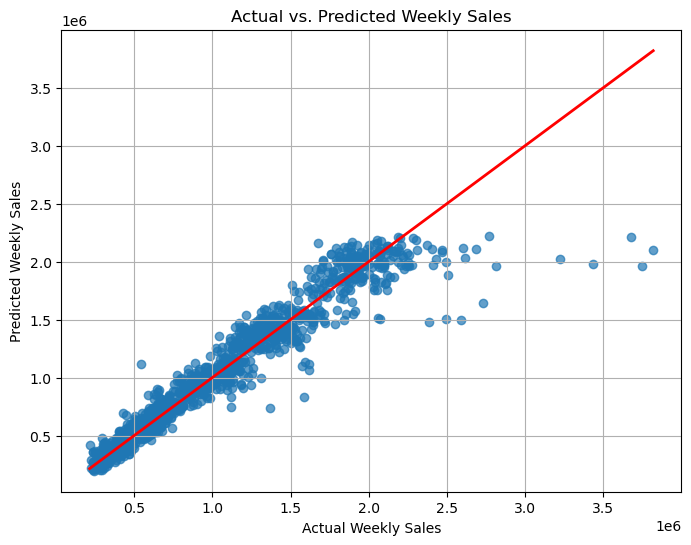

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales")
plt.grid(True)
plt.show()

/var/folders/5v/srp_58ns2t15ctwyp2j8rb1w0000gn/T/ipykernel_80836/1499622240.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.values, y=top_stores.index, palette='coolwarm')


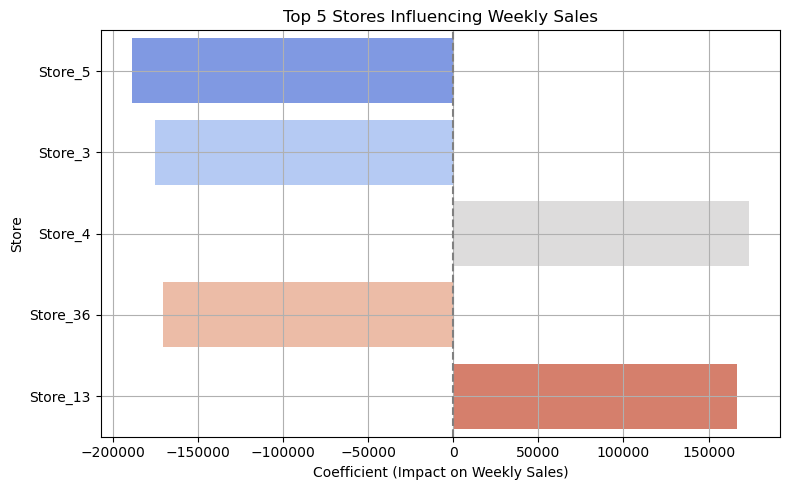

In [33]:
# Remember: only works if X was manually encoded and scaled
import seaborn as sns
coef_series = pd.Series(model.coef_, index=X.columns)

# Filter only store-related features
store_coefs = coef_series[coef_series.index.str.startswith('Store_')]

# Sort by absolute value to find most influential
top_stores = store_coefs.abs().sort_values(ascending=False).head(5)
top_stores = store_coefs.loc[top_stores.index]  # preserve original sign for direction

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_stores.values, y=top_stores.index, palette='coolwarm')
plt.title("Top 5 Stores Influencing Weekly Sales")
plt.xlabel("Coefficient (Impact on Weekly Sales)")
plt.ylabel("Store")
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()
